# Principal component analysis
It is a technique for reduction of dimensionality, to the minimun variables neccesary in order to use it in a machine learning algorithm for future training. We use the eigenvalues and eigenvectors to obtain the minimal variable and the necessary variance.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

iris = sns.load_dataset('iris') #dataser

scaler = StandardScaler()     #scaled of the data set
scaled = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
)

covariance_matrix = np.cov(scaled.T)  #matrix of covariance
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

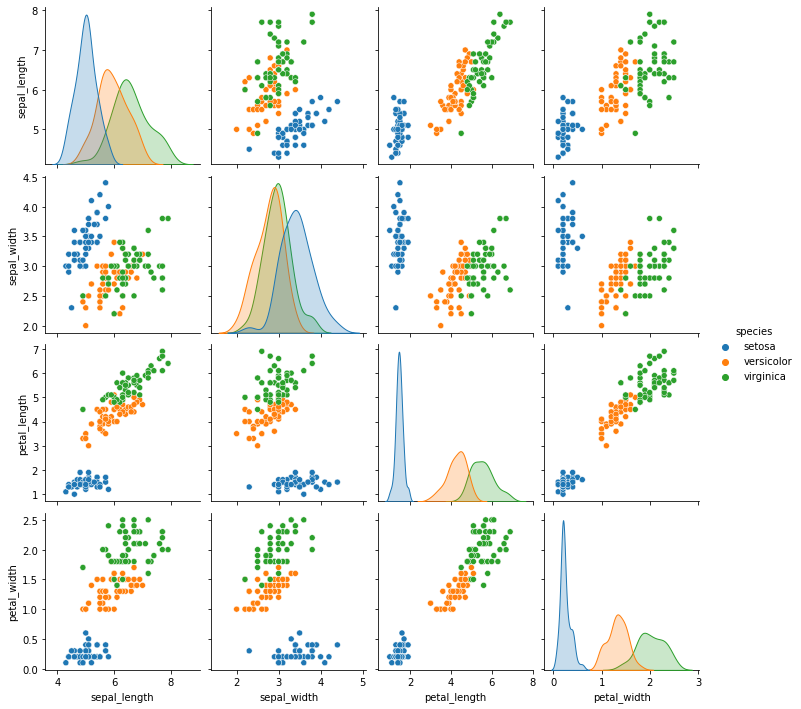

In [4]:
#we can visualize the data depending on the number of variables
sns.pairplot(iris, hue = 'species')

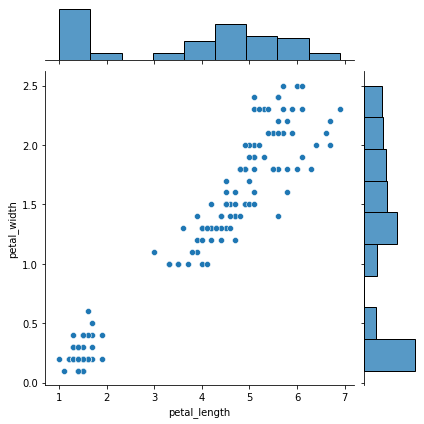

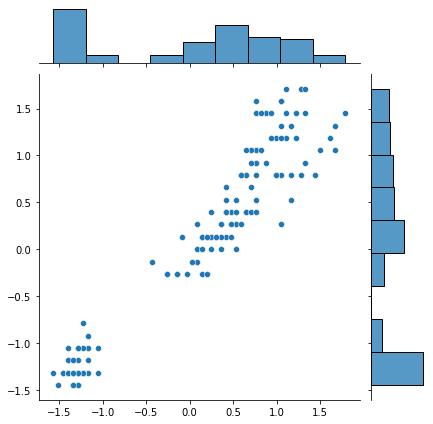

In [5]:
sns.jointplot(x = iris['petal_length'], y = iris['petal_width'])
sns.jointplot(x =scaled[:,2], y = scaled[:,3])

we use from numpy eig function to obtain eigenvalues and eigenvectors

link: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

In [6]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)  # we calculate the eigen vector and values

In [7]:
eigen_values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [8]:
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [9]:
variance_explanied = []
for i in eigen_values:
    variance_explanied.append((i/sum(eigen_values))*100)

print(variance_explanied)

[72.9624454132999, 22.850761786701725, 3.6689218892828612, 0.5178709107154993]


PCA with scikit: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 

Now we can do the reduction to less dimension

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)  #we set the number of the reduction
pca.fit(scaled) #we do the fit to the normalized data

PCA(n_components=2)

In [12]:
pca.explained_variance_ratio_  #this show as the directions that capture the most variance

array([0.72962445, 0.22850762])

In [14]:
reduce_scaled = pca.transform(scaled)
reduce_scaled #we are capture more than 90% of variance

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


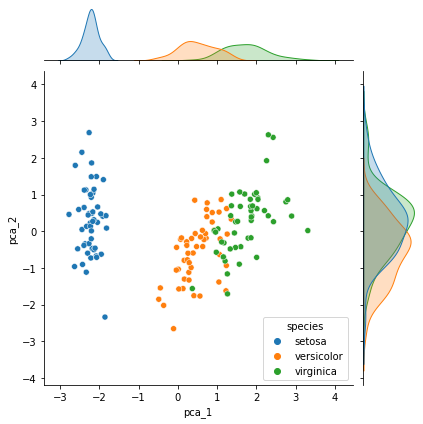

In [20]:
iris['pca_1'] = reduce_scaled[:,0] #i create the first component and put it in iris dataset
iris['pca_2'] = reduce_scaled[:,1] #I create the second component and put it in iris dataset
sns.jointplot(iris['pca_1'], iris['pca_2'], hue = iris['species'])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=06b1d1b6-065a-485c-94c4-0ed2a2949cfc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>